In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import seaborn as sns

<AxesSubplot:xlabel='input_feature', ylabel='target'>

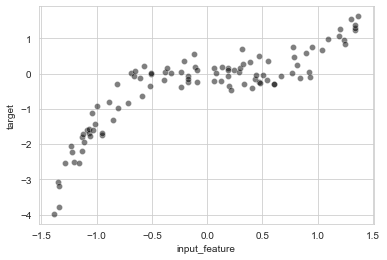

In [5]:
rng = np.random.RandomState(0)
n_sample = 100
data_max, data_min = 1.4, -1.4
len_data = (data_max - data_min)
# sort the data to make plotting easier later
data = np.sort(rng.rand(n_sample) * len_data - len_data / 2)
noise = rng.randn(n_sample) * .3
target = data ** 3 - 0.5 * data ** 2 + noise
full_data = pd.DataFrame({"input_feature": data, "target": target})
sns.scatterplot(data=full_data, x="input_feature", y="target",
                color="black", alpha=0.5)

In [9]:
data

array([-1.38685267, -1.34738856, -1.34369887, -1.34338849, -1.29027418,
       -1.23136868, -1.22038701, -1.20109904, -1.15603796, -1.13696657,
       -1.13092446, -1.12811643, -1.11427453, -1.0909496 , -1.06883161,
       -1.06756239, -1.06344963, -1.03900637, -1.03096599, -1.01308774,
       -0.9986108 , -0.95488517, -0.94833335, -0.88706419, -0.84956939,
       -0.81514508, -0.81092883, -0.71560834, -0.69078351, -0.65924429,
       -0.65690943, -0.6081405 , -0.58966294, -0.57080745, -0.51680062,
       -0.5096471 , -0.50800693, -0.39337788, -0.38160984, -0.36756952,
       -0.32636375, -0.24006362, -0.23894657, -0.21376656, -0.17631053,
       -0.17475581, -0.17191576, -0.12277907, -0.10785779, -0.09432984,
       -0.08777664,  0.0611753 ,  0.06509455,  0.08090578,  0.12567291,
        0.13667781,  0.18648407,  0.19052477,  0.19161506,  0.19655096,
        0.21265019,  0.24223622,  0.28773745,  0.29356746,  0.31386802,
        0.32741519,  0.32937939,  0.39177886,  0.40850352,  0.42

In [8]:
print(type(data))
print(data.ndim)

<class 'numpy.ndarray'>
1


In [10]:
X = data.copy()
X

array([-1.38685267, -1.34738856, -1.34369887, -1.34338849, -1.29027418,
       -1.23136868, -1.22038701, -1.20109904, -1.15603796, -1.13696657,
       -1.13092446, -1.12811643, -1.11427453, -1.0909496 , -1.06883161,
       -1.06756239, -1.06344963, -1.03900637, -1.03096599, -1.01308774,
       -0.9986108 , -0.95488517, -0.94833335, -0.88706419, -0.84956939,
       -0.81514508, -0.81092883, -0.71560834, -0.69078351, -0.65924429,
       -0.65690943, -0.6081405 , -0.58966294, -0.57080745, -0.51680062,
       -0.5096471 , -0.50800693, -0.39337788, -0.38160984, -0.36756952,
       -0.32636375, -0.24006362, -0.23894657, -0.21376656, -0.17631053,
       -0.17475581, -0.17191576, -0.12277907, -0.10785779, -0.09432984,
       -0.08777664,  0.0611753 ,  0.06509455,  0.08090578,  0.12567291,
        0.13667781,  0.18648407,  0.19052477,  0.19161506,  0.19655096,
        0.21265019,  0.24223622,  0.28773745,  0.29356746,  0.31386802,
        0.32741519,  0.32937939,  0.39177886,  0.40850352,  0.42

In [15]:
X = X.reshape((-1, 1))
print(type(X))
print(X.ndim)

<class 'numpy.ndarray'>
2


In [11]:
y = target.copy()
y

array([-3.9786425 , -3.08360456, -3.18914872, -3.78762272, -2.53398616,
       -2.0564536 , -2.20861498, -2.50804909, -2.53439428, -1.79975968,
       -2.20688937, -1.70528344, -1.94181324, -1.60051043, -1.68532489,
       -1.57456236, -1.76499444, -1.1256489 , -1.58917613, -1.43235589,
       -0.92950472, -1.73090028, -1.68368403, -0.80063804, -1.32601321,
       -0.29077693, -0.98615979, -0.84674376,  0.00866231, -0.05965664,
        0.06102657, -0.13801561, -0.63724611,  0.22412778, -0.35197105,
       -0.02150898,  0.02403819, -0.18474982,  0.05583843,  0.15944698,
        0.02490893, -0.3724705 ,  0.04728096,  0.36529939, -0.22939374,
       -0.06549713, -0.15040456,  0.54539091,  0.19461703,  0.11695013,
       -0.23550349,  0.16013249, -0.20414262,  0.00680588, -0.19666583,
        0.19614283,  0.16207432, -0.07372348,  0.10747925, -0.33964138,
       -0.46037127,  0.11669235,  0.03242823,  0.17271869,  0.69660699,
        0.26484263, -0.29235743,  0.31849395, -0.41004071, -0.15

## Regresión simple

In [17]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

In [20]:
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
print('r2: ', r2)
print('mae: ', mae)

r2:  0.7145596810208774
mae:  0.4578252636473553


Text(0.5, 1.0, 'Regresión lineal. R2 = 0.7146')

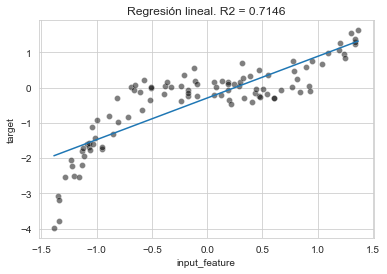

In [23]:
ax = sns.scatterplot(data=full_data, x="input_feature", y="target", color="black", alpha=0.5)
ax.plot(X, y_pred)
ax.set_title(f"Regresión lineal. R2 = {r2:.4f}")

## Regresión polinómica

In [25]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(
    PolynomialFeatures(degree=3), # paso 1 - transformación polinómica
    LinearRegression() # paso 2 - Regresión lineal
)

In [26]:
model.fit(X, y)
y_pred = model.predict(X)

In [27]:
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
print('r2: ', r2)
print('mae: ', mae)

r2:  0.933159751720652
mae:  0.24677101025157175


Text(0.5, 1.0, 'Regresión lineal. R2 = 0.9332')

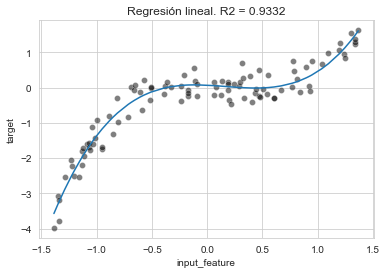

In [28]:
ax = sns.scatterplot(data=full_data, x="input_feature", y="target", color="black", alpha=0.5)
ax.plot(X, y_pred)
ax.set_title(f"Regresión lineal. R2 = {r2:.4f}")